**Setup and Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("=" * 70)
print("IPL PLAYER PERFORMANCE ANALYSIS")
print("=" * 70)

# Load data
matches = pd.read_csv('../data/matches.csv')
deliveries = pd.read_csv('../data/deliveries.csv')
player_stats = pd.read_csv('../data/player_statistics.csv')

print(f"\n✓ Matches: {matches.shape}")
print(f"✓ Deliveries: {deliveries.shape}")
print(f"✓ Player Statistics: {player_stats.shape}")

print("\n" + "=" * 70)

IPL PLAYER PERFORMANCE ANALYSIS

✓ Matches: (1095, 20)
✓ Deliveries: (260920, 17)
✓ Player Statistics: (299, 18)



**Data Overview**

In [2]:
print("DATASET OVERVIEW")
print("=" * 70)

print("\n📊 Player Statistics Summary:")
print(player_stats.describe())

print("\n📊 Role Distribution:")
print(player_stats['role'].value_counts())

print("\n🏏 Top 5 Batsmen by Total Runs:")
top_batsmen = player_stats.nlargest(5, 'total_runs')[['player', 'total_runs', 'batting_average', 'strike_rate']]
print(top_batsmen.to_string(index=False))

print("\n🎯 Top 5 Bowlers by Wickets:")
top_bowlers = player_stats[player_stats['wickets'] > 0].nlargest(5, 'wickets')[['player', 'wickets', 'economy_rate', 'bowling_average']]
print(top_bowlers.to_string(index=False))

DATASET OVERVIEW

📊 Player Statistics Summary:
        total_runs  balls_faced   times_out  matches_played  batting_average  \
count   299.000000   299.000000  299.000000      299.000000       299.000000   
mean   1024.672241   803.317726   38.551839       49.013378        20.408227   
std    1385.292933  1059.766811   42.516161       48.887624        11.069313   
min       0.000000     0.000000    0.000000        0.000000         0.000000   
25%      86.000000    82.000000    9.000000       17.000000        12.110000   
50%     460.000000   367.000000   24.000000       29.000000        20.330000   
75%    1388.500000  1086.000000   51.000000       65.000000        27.715000   
max    8014.000000  6236.000000  232.000000      251.000000        88.000000   

       strike_rate       fours       sixes  runs_conceded     wickets  \
count   299.000000  299.000000  299.000000     299.000000  299.000000   
mean    112.544682   92.692308   40.692308     987.284281   37.484950   
std      30.2

**Batting Performance Visualization**


BATTING PERFORMANCE ANALYSIS


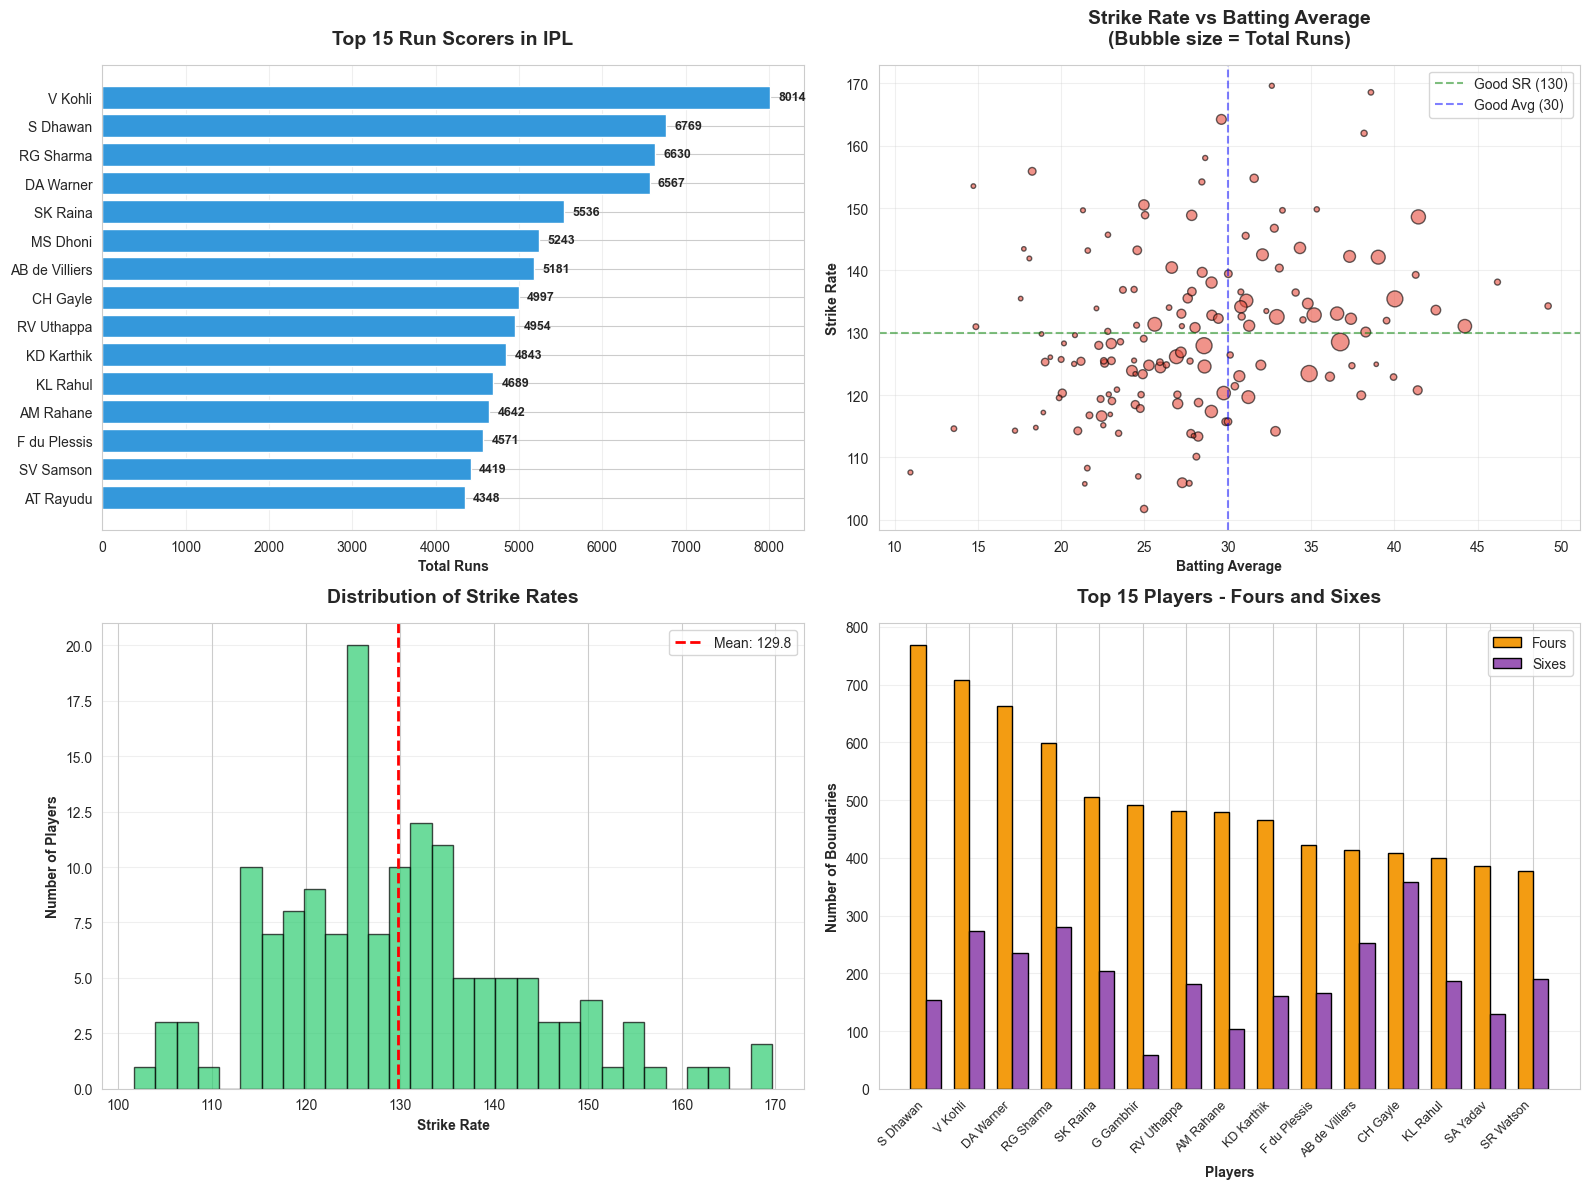


✓ Batting analysis complete!
✓ Saved: outputs/visualizations/batting_analysis.png


In [4]:
print("\n" + "=" * 70)
print("BATTING PERFORMANCE ANALYSIS")
print("=" * 70)

# Filter batsmen only
batsmen = player_stats[player_stats['role'].isin(['Batsman', 'All-rounder'])].copy()
batsmen = batsmen[batsmen['total_runs'] > 500]  # Minimum 500 runs

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 Run Scorers
top15 = batsmen.nlargest(15, 'total_runs')
axes[0, 0].barh(range(len(top15)), top15['total_runs'], color='#3498db')
axes[0, 0].set_yticks(range(len(top15)))
axes[0, 0].set_yticklabels(top15['player'], fontsize=10)
axes[0, 0].set_xlabel('Total Runs', fontweight='bold')
axes[0, 0].set_title('Top 15 Run Scorers in IPL', fontweight='bold', fontsize=14, pad=15)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top15.iterrows()):
    axes[0, 0].text(row['total_runs'] + 100, i, f"{int(row['total_runs'])}", 
                    va='center', fontsize=9, fontweight='bold')

# 2. Strike Rate vs Average
axes[0, 1].scatter(batsmen['batting_average'], batsmen['strike_rate'], 
                   s=batsmen['total_runs']/50, alpha=0.6, c='#e74c3c', edgecolors='black')
axes[0, 1].set_xlabel('Batting Average', fontweight='bold')
axes[0, 1].set_ylabel('Strike Rate', fontweight='bold')
axes[0, 1].set_title('Strike Rate vs Batting Average\n(Bubble size = Total Runs)', 
                     fontweight='bold', fontsize=14, pad=15)
axes[0, 1].grid(alpha=0.3)

# Add reference lines
axes[0, 1].axhline(y=130, color='green', linestyle='--', alpha=0.5, label='Good SR (130)')
axes[0, 1].axvline(x=30, color='blue', linestyle='--', alpha=0.5, label='Good Avg (30)')
axes[0, 1].legend()

# 3. Distribution of Strike Rates
axes[1, 0].hist(batsmen['strike_rate'], bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Strike Rate', fontweight='bold')
axes[1, 0].set_ylabel('Number of Players', fontweight='bold')
axes[1, 0].set_title('Distribution of Strike Rates', fontweight='bold', fontsize=14, pad=15)
axes[1, 0].axvline(batsmen['strike_rate'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {batsmen["strike_rate"].mean():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Boundaries Analysis
top15_boundaries = batsmen.nlargest(15, 'fours')
x = np.arange(len(top15_boundaries))
width = 0.35

axes[1, 1].bar(x - width/2, top15_boundaries['fours'], width, label='Fours', 
               color='#f39c12', edgecolor='black')
axes[1, 1].bar(x + width/2, top15_boundaries['sixes'], width, label='Sixes', 
               color='#9b59b6', edgecolor='black')
axes[1, 1].set_xlabel('Players', fontweight='bold')
axes[1, 1].set_ylabel('Number of Boundaries', fontweight='bold')
axes[1, 1].set_title('Top 15 Players - Fours and Sixes', fontweight='bold', fontsize=14, pad=15)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(top15_boundaries['player'], rotation=45, ha='right', fontsize=9)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/batting_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Batting analysis complete!")
print("✓ Saved: outputs/visualizations/batting_analysis.png")

**Bowling Performance Analysis**


BOWLING PERFORMANCE ANALYSIS


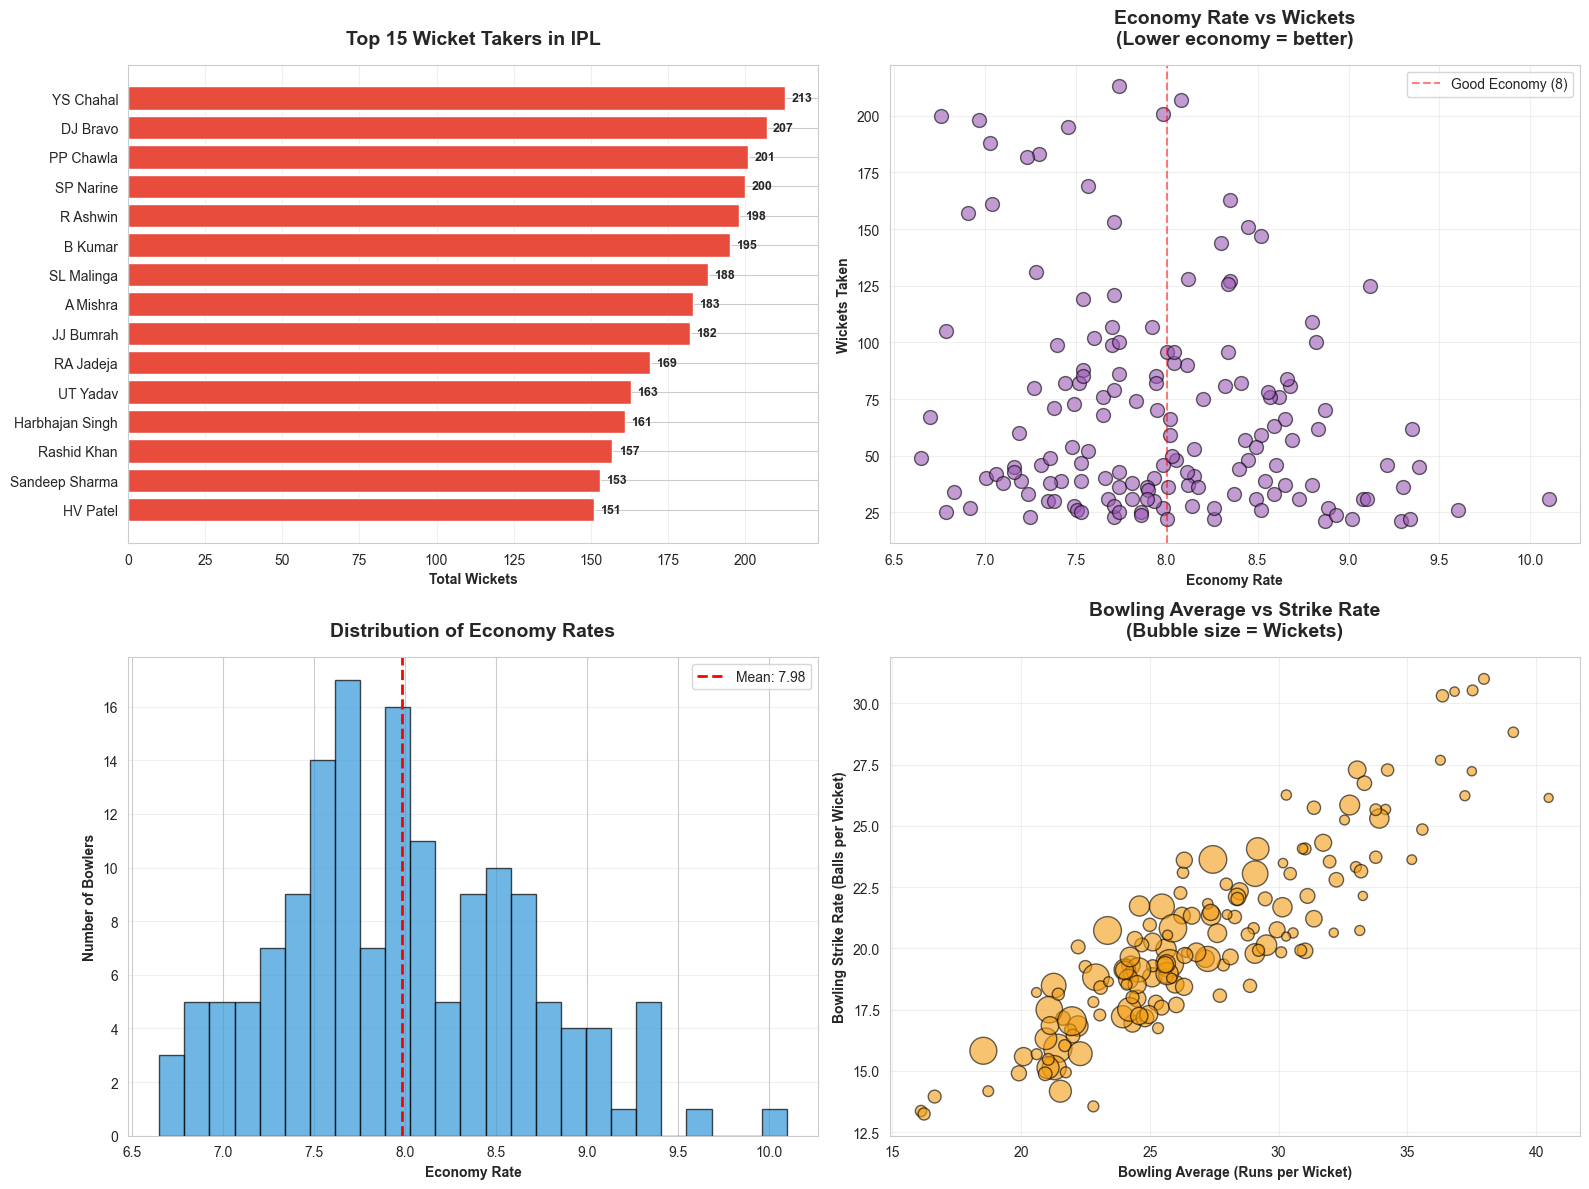


✓ Bowling analysis complete!
✓ Saved: outputs/visualizations/bowling_analysis.png


In [5]:
print("\n" + "=" * 70)
print("BOWLING PERFORMANCE ANALYSIS")
print("=" * 70)

# Filter bowlers
bowlers = player_stats[player_stats['role'].isin(['Bowler', 'All-rounder'])].copy()
bowlers = bowlers[bowlers['wickets'] > 20]  # Minimum 20 wickets

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 Wicket Takers
top15_bowl = bowlers.nlargest(15, 'wickets')
axes[0, 0].barh(range(len(top15_bowl)), top15_bowl['wickets'], color='#e74c3c')
axes[0, 0].set_yticks(range(len(top15_bowl)))
axes[0, 0].set_yticklabels(top15_bowl['player'], fontsize=10)
axes[0, 0].set_xlabel('Total Wickets', fontweight='bold')
axes[0, 0].set_title('Top 15 Wicket Takers in IPL', fontweight='bold', fontsize=14, pad=15)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(top15_bowl.iterrows()):
    axes[0, 0].text(row['wickets'] + 2, i, f"{int(row['wickets'])}", 
                    va='center', fontsize=9, fontweight='bold')

# 2. Economy Rate vs Wickets
axes[0, 1].scatter(bowlers['economy_rate'], bowlers['wickets'], 
                   s=100, alpha=0.6, c='#9b59b6', edgecolors='black')
axes[0, 1].set_xlabel('Economy Rate', fontweight='bold')
axes[0, 1].set_ylabel('Wickets Taken', fontweight='bold')
axes[0, 1].set_title('Economy Rate vs Wickets\n(Lower economy = better)', 
                     fontweight='bold', fontsize=14, pad=15)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].axvline(x=8, color='red', linestyle='--', alpha=0.5, label='Good Economy (8)')
axes[0, 1].legend()

# 3. Distribution of Economy Rates
axes[1, 0].hist(bowlers['economy_rate'], bins=25, color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Economy Rate', fontweight='bold')
axes[1, 0].set_ylabel('Number of Bowlers', fontweight='bold')
axes[1, 0].set_title('Distribution of Economy Rates', fontweight='bold', fontsize=14, pad=15)
axes[1, 0].axvline(bowlers['economy_rate'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {bowlers["economy_rate"].mean():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Bowling Average vs Strike Rate
axes[1, 1].scatter(bowlers['bowling_average'], bowlers['bowling_strike_rate'], 
                   s=bowlers['wickets']*2, alpha=0.6, c='#f39c12', edgecolors='black')
axes[1, 1].set_xlabel('Bowling Average (Runs per Wicket)', fontweight='bold')
axes[1, 1].set_ylabel('Bowling Strike Rate (Balls per Wicket)', fontweight='bold')
axes[1, 1].set_title('Bowling Average vs Strike Rate\n(Bubble size = Wickets)', 
                     fontweight='bold', fontsize=14, pad=15)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/bowling_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Bowling analysis complete!")
print("✓ Saved: outputs/visualizations/bowling_analysis.png")

**Prepare Data for ML Model**

In [6]:
print("\n" + "=" * 70)
print("PREPARING DATA FOR ML MODEL")
print("=" * 70)

# For batsmen - predict if they'll score 30+ runs in next match
batsmen_ml = player_stats[player_stats['role'].isin(['Batsman', 'All-rounder'])].copy()
batsmen_ml = batsmen_ml[batsmen_ml['total_runs'] > 200]

# Create target variable: High performer if batting average > 25
batsmen_ml['high_performer'] = (batsmen_ml['batting_average'] > 25).astype(int)

# Select features for ML
ml_features = [
    'strike_rate', 'fours', 'sixes', 'balls_faced', 
    'matches_played', 'times_out'
]

X = batsmen_ml[ml_features]
y = batsmen_ml['high_performer']

print(f"\n✓ Dataset prepared for ML")
print(f"  • Total players: {len(batsmen_ml)}")
print(f"  • Features: {len(ml_features)}")
print(f"  • Target distribution:")
print(f"    - High performers (avg > 25): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")
print(f"    - Regular performers: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")

print(f"\n📊 Sample Data:")
print(batsmen_ml[['player', 'batting_average', 'strike_rate', 'high_performer']].head(10))


PREPARING DATA FOR ML MODEL

✓ Dataset prepared for ML
  • Total players: 195
  • Features: 6
  • Target distribution:
    - High performers (avg > 25): 92 (47.2%)
    - Regular performers: 103 (52.8%)

📊 Sample Data:
           player  batting_average  strike_rate  high_performer
0         V Kohli            36.76       128.51               1
1        S Dhawan            34.89       123.45               1
2       RG Sharma            28.58       127.92               1
3       DA Warner            40.04       135.43               1
4        SK Raina            32.95       132.54               1
5        MS Dhoni            35.19       132.84               1
6  AB de Villiers            41.45       148.58               1
7        CH Gayle            39.04       142.12               1
8      RV Uthappa            26.92       126.15               1
9      KD Karthik            25.62       131.35               1
